In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'chart_studio'

In [26]:
Tata_Motors = pd.read_csv('TATA_MOTO.csv')
Tata_Motors.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,0,2014-08-01,440.079712,450.913513,433.351868,435.330658,432.467834,8882644.0
1,1,1,1,2014-08-04,437.606232,443.641510,436.468445,441.860596,438.954834,7517951.0
2,2,2,2,2014-08-05,444.927704,453.040680,439.486084,451.952362,448.980225,4030664.0
3,3,3,3,2014-08-06,450.171448,450.171448,440.475464,442.800507,439.888550,4859128.0
4,4,4,4,2014-08-07,442.849976,445.570801,435.528534,437.309418,434.433563,4871343.0


In [27]:
Tata_Motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  2462 non-null   int64  
 1   Unnamed: 0.1  2462 non-null   int64  
 2   Unnamed: 0    2462 non-null   int64  
 3   Date          2462 non-null   object 
 4   Open          2462 non-null   float64
 5   High          2462 non-null   float64
 6   Low           2462 non-null   float64
 7   Close         2462 non-null   float64
 8   Adj Close     2462 non-null   float64
 9   Volume        2462 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 192.5+ KB


In [28]:
Tata_Motors['Date'] = pd.to_datetime(Tata_Motors['Date'])

In [29]:
print(f'Dataframe contains stock prices between {Tata_Motors.Date.min()} {Tata_Motors.Date.max()}') 
print(f'Total days = {(Tata_Motors.Date.max()  - Tata_Motors.Date.min()).days} days')

Dataframe contains stock prices between 2014-08-01 00:00:00 2024-07-31 00:00:00
Total days = 3652 days


In [30]:
Tata_Motors.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2.462000e+03
mean,1230.500000,1230.500000,1231.443542,402.333110,407.539461,396.202429,401.613236,399.399677,2.304372e+07
std,710.862504,710.862504,710.954822,201.390461,203.035200,199.199970,201.220937,200.689093,3.012001e+07
min,0.000000,0.000000,0.000000,66.500000,66.900002,63.500000,65.300003,64.896851,0.000000e+00
25%,615.250000,615.250000,616.250000,268.387512,271.537498,261.850006,266.725006,265.078278,6.981107e+06
50%,1230.500000,1230.500000,1231.500000,411.875000,417.449997,405.775009,411.425003,408.802124,1.191602e+07
75%,1845.750000,1845.750000,1846.750000,493.741631,502.346245,486.421295,493.887497,490.788628,2.618843e+07
max,2461.000000,2461.000000,2462.000000,1164.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08


<Axes: >

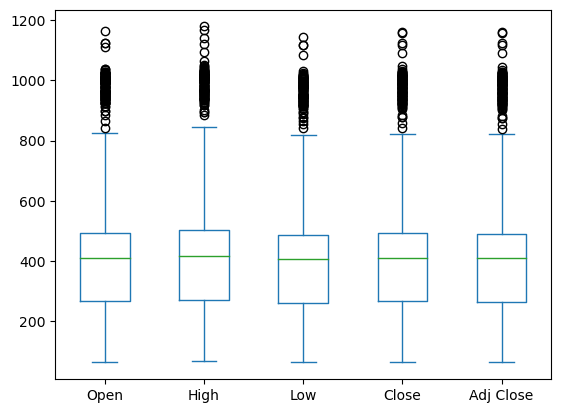

In [31]:
Tata_Motors[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [32]:
layout = go.Layout(
    title='Stock Prices of Tata_Motors',
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Price'
    )
)

Tata_Motors_data = [{'x':Tata_Motors['Date'], 'y':Tata_Motors['Close']}]
plot = go.Figure(data=Tata_Motors_data, layout=layout)

In [45]:
#plot(plot) #plotting offine
iplot(plot)

In [46]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessingabs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [47]:
#Split the data into train and test sets

X = np.array(Tata_Motors.index).reshape(-1,1)
Y = Tata_Motors['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [48]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [49]:
from sklearn.linear_model import LinearRegression

In [75]:
#Creating a linear model 
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [76]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

Tata_motors_data = [trace0, trace1]

layout = go.Layout(
    xaxis=dict(
        title=dict(
            text='Day'
        )
    )
)

plot2 = go.Figure(data=Tata_motors_data, layout=layout)
plot2.show()


In [77]:
iplot(plot2)

In [78]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.05910804010860349	0.06389902291145533
MSE       37062.06150006366	40187.25243295751

